In [1]:
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
tickers = ['XIC.TO', '^GSPC', 'CSU.TO', 'ATD.TO', 'VFV.TO', 'VDY.TO', 'HXQ.TO', 'XMH.TO', 'ZFL.TO', 'PGHY', 'HGY.TO', 'VRE.TO', 'XEF.TO', 'NVDA']
start = dt.datetime(2018, 12, 30)
end = dt.datetime(2021, 12, 30)
df_stocks = pdr.get_data_yahoo(tickers, start, end, interval="d")

df_stocks = df_stocks['Adj Close']

df_stocks

Symbols,XIC.TO,^GSPC,CSU.TO,ATD.TO,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA
Date,,,,,,,,,,,,,,
2018-12-31,21.078617,2506.850098,865.645020,33.312305,57.912556,26.294298,12.005000,15.701625,15.984076,19.428421,3.993625,26.817968,26.027300,33.161427
2019-01-02,21.087868,2510.030029,842.712646,33.336815,57.941288,26.478354,12.055000,15.740879,16.131475,19.454094,3.993625,26.711584,25.785446,33.837082
2019-01-03,20.875139,2447.889893,817.719849,32.341602,56.025875,26.329357,11.600000,15.593677,16.352589,19.454094,4.010690,26.525410,25.320341,31.792742
2019-01-04,21.217358,2531.939941,834.748291,33.052467,57.644394,26.688717,12.007500,16.094168,16.168320,19.505449,3.976557,26.747044,25.971489,33.829628
2019-01-07,21.319096,2549.689941,872.430664,33.939812,57.606091,26.758829,12.062500,16.251179,16.094624,19.548243,3.993625,27.021873,25.915676,35.620594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,33.737690,NaN,2325.000000,52.450001,107.399185,42.889011,59.110001,25.882492,17.817001,NaN,5.114951,37.893097,35.696564,NaN
2021-12-27,NaN,4791.189941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.299999,NaN,NaN,NaN,309.450012
2021-12-28,NaN,4786.350098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.290001,NaN,NaN,NaN,303.220001


In [4]:
# Checking how many missing NaN
df_stocks.isna().sum()

Symbols
XIC.TO    16
^GSPC     13
CSU.TO    16
ATD.TO    16
VFV.TO    16
VDY.TO    16
HXQ.TO    16
XMH.TO    16
ZFL.TO    16
PGHY      13
HGY.TO    16
VRE.TO    16
XEF.TO    16
NVDA      13
dtype: int64

In [5]:
# Checking if there are double-dates (divident stocks might show date a second time for the divident value)
print(df_stocks.index.has_duplicates)
print(df_stocks.index.nunique())
print(len(df_stocks))

False
770
770


In [6]:
# No duplicated dates
# 1.9% NaN for specific stocks; it is not a big impact to fill these gaps and certainly stem from days where certain stock markets were closed and others not.
df_stocks.fillna(method="ffill", inplace=True)
df_stocks

Symbols,XIC.TO,^GSPC,CSU.TO,ATD.TO,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA
Date,,,,,,,,,,,,,,
2018-12-31,21.078617,2506.850098,865.645020,33.312305,57.912556,26.294298,12.005000,15.701625,15.984076,19.428421,3.993625,26.817968,26.027300,33.161427
2019-01-02,21.087868,2510.030029,842.712646,33.336815,57.941288,26.478354,12.055000,15.740879,16.131475,19.454094,3.993625,26.711584,25.785446,33.837082
2019-01-03,20.875139,2447.889893,817.719849,32.341602,56.025875,26.329357,11.600000,15.593677,16.352589,19.454094,4.010690,26.525410,25.320341,31.792742
2019-01-04,21.217358,2531.939941,834.748291,33.052467,57.644394,26.688717,12.007500,16.094168,16.168320,19.505449,3.976557,26.747044,25.971489,33.829628
2019-01-07,21.319096,2549.689941,872.430664,33.939812,57.606091,26.758829,12.062500,16.251179,16.094624,19.548243,3.993625,27.021873,25.915676,35.620594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,33.737690,4725.790039,2325.000000,52.450001,107.399185,42.889011,59.110001,25.882492,17.817001,21.290001,5.114951,37.893097,35.696564,296.399994
2021-12-27,33.737690,4791.189941,2325.000000,52.450001,107.399185,42.889011,59.110001,25.882492,17.817001,21.299999,5.114951,37.893097,35.696564,309.450012
2021-12-28,33.737690,4786.350098,2325.000000,52.450001,107.399185,42.889011,59.110001,25.882492,17.817001,21.290001,5.114951,37.893097,35.696564,303.220001


In [7]:
df_stocks.describe()

Symbols,XIC.TO,^GSPC,CSU.TO,ATD.TO,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,26.869739,3466.701412,1530.237364,42.530961,78.533610,32.513670,24.246464,20.305905,18.002644,20.559364,4.814797,30.906595,30.335837,112.371077
std,3.751674,639.484719,345.265244,4.320955,13.057270,4.946874,14.267909,3.696405,1.156823,0.834005,0.479984,4.098268,3.097153,73.469614
min,17.139845,2237.399902,817.719849,30.678612,56.025875,20.500385,11.600000,11.086022,15.845881,16.551649,3.925595,18.552402,22.093575,31.792742
25%,24.328180,2934.704956,1267.651642,39.855038,67.421091,29.053019,14.584375,17.862125,17.142759,20.198025,4.434937,28.349164,28.128266,46.873572
50%,25.613499,3275.359985,1493.828491,42.042862,75.709251,31.170432,19.622499,18.785347,17.764737,20.443170,4.987541,31.247711,29.288013,95.570896
75%,30.079418,4052.247559,1733.559326,44.941048,87.934896,36.618289,23.503749,24.692444,19.067126,21.337170,5.169670,33.499472,33.150745,143.246716
max,34.937408,4793.060059,2372.760010,53.480000,108.754997,43.248001,59.660000,27.395105,20.632431,21.662687,5.758933,38.529999,36.349186,333.719147


In [8]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 770 entries, 2018-12-31 to 2021-12-30
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XIC.TO  770 non-null    float64
 1   ^GSPC   770 non-null    float64
 2   CSU.TO  770 non-null    float64
 3   ATD.TO  770 non-null    float64
 4   VFV.TO  770 non-null    float64
 5   VDY.TO  770 non-null    float64
 6   HXQ.TO  770 non-null    float64
 7   XMH.TO  770 non-null    float64
 8   ZFL.TO  770 non-null    float64
 9   PGHY    770 non-null    float64
 10  HGY.TO  770 non-null    float64
 11  VRE.TO  770 non-null    float64
 12  XEF.TO  770 non-null    float64
 13  NVDA    770 non-null    float64
dtypes: float64(14)
memory usage: 106.4 KB


In [9]:
# Let's create a function that can plot a dataset
def plot_that_chart(df, title):
    df.plot(title=title, figsize=(20, 7))
    plt.grid()

    plt.show();

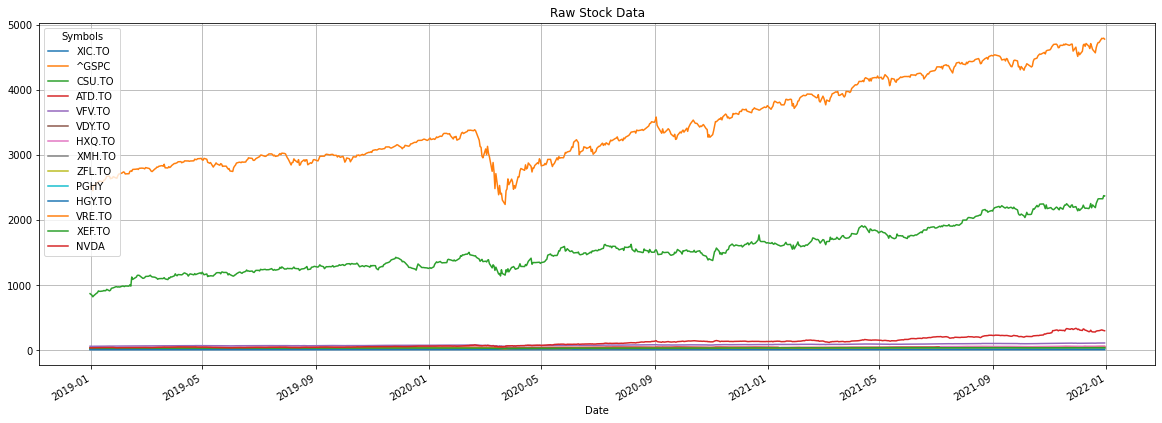

In [10]:
plot_that_chart(df_stocks, 'Raw Stock Data')

In [11]:
# Scaling to first closing values
df_stocks_normalized = df_stocks / df_stocks.iloc[0]
df_stocks_normalized

Symbols,XIC.TO,^GSPC,CSU.TO,ATD.TO,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA
Date,,,,,,,,,,,,,,
2018-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-02,1.000439,1.001268,0.973508,1.000736,1.000496,1.007000,1.004165,1.002500,1.009222,1.001321,1.000000,0.996033,0.990708,1.020375
2019-01-03,0.990347,0.976480,0.944636,0.970861,0.967422,1.001333,0.966264,0.993125,1.023055,1.001321,1.004273,0.989091,0.972838,0.958727
2019-01-04,1.006582,1.010009,0.964308,0.992200,0.995370,1.015000,1.000208,1.025000,1.011527,1.003965,0.995726,0.997355,0.997856,1.020150
2019-01-07,1.011409,1.017089,1.007839,1.018837,0.994708,1.017667,1.004790,1.035000,1.006916,1.006167,1.000000,1.007603,0.995711,1.074157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,1.600565,1.885151,2.685858,1.574493,1.854506,1.631115,4.923782,1.648396,1.114672,1.095817,1.280779,1.412974,1.371505,8.938095
2021-12-27,1.600565,1.911239,2.685858,1.574493,1.854506,1.631115,4.923782,1.648396,1.114672,1.096332,1.280779,1.412974,1.371505,9.331625
2021-12-28,1.600565,1.909308,2.685858,1.574493,1.854506,1.631115,4.923782,1.648396,1.114672,1.095817,1.280779,1.412974,1.371505,9.143756


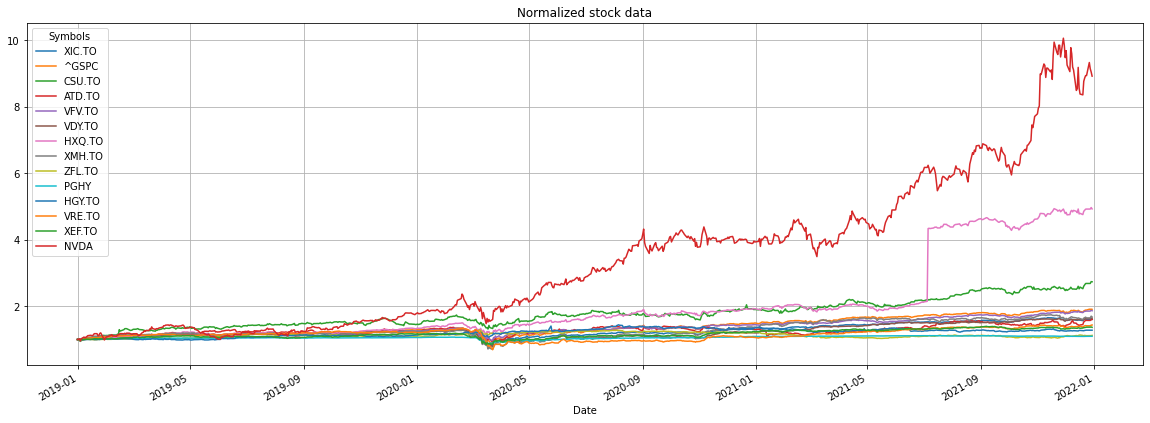

In [12]:
# Plot the normalized stock data
plot_that_chart(df_stocks_normalized, 'Normalized stock data')

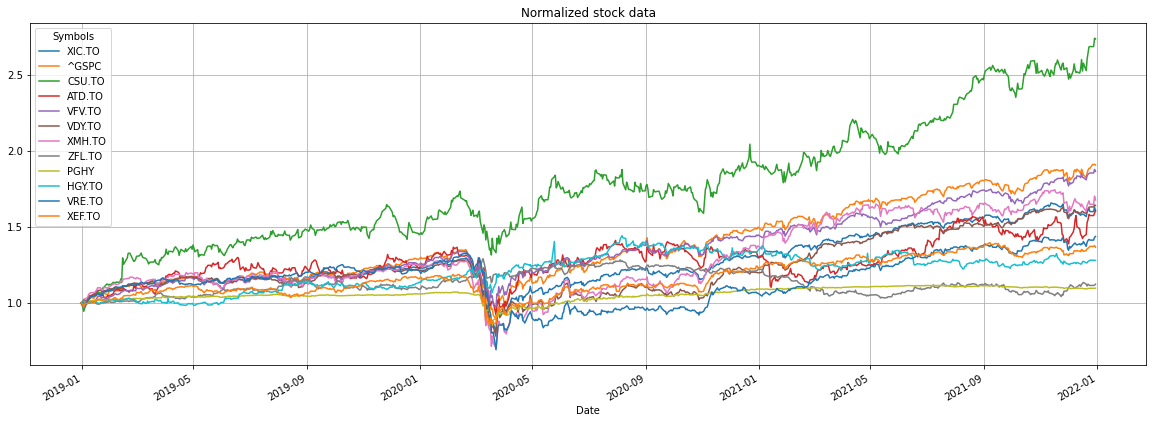

In [13]:
plot_that_chart(df_stocks_normalized.drop(['NVDA', 'HXQ.TO'], axis=1), 'Normalized stock data')

In [14]:
def calc_return(df):
    '''Function to generate a detaframe with returns
    - Input: Dataframe with raw stock data
    - Output: Dataframe with returns'''

    x = df.copy()
    
    for i in range(1, len(df)):
        x.iloc[i] = (df.iloc[i] - df.iloc[i-1]) / df.iloc[i-1] * 100
    #x = np.sum(np.log(df/df.shift()), axis=1)

    x.iloc[0] = 0

    return x

In [15]:
# Generate data table with daily returns
df_stock_returns = calc_return(df_stocks)
df_stock_returns

Symbols,XIC.TO,^GSPC,CSU.TO,ATD.TO,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA
Date,,,,,,,,,,,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.043886,0.126850,-2.649166,0.073575,0.049613,0.699982,0.416495,0.250001,0.922161,0.132141,0.000000,-0.396690,-0.929231,2.037474
2019-01-03,-1.008772,-2.475673,-2.965756,-2.985326,-3.305782,-0.562710,-3.774367,-0.935161,1.370694,0.000000,0.427319,-0.696980,-1.803750,-6.041715
2019-01-04,1.639359,3.433571,2.082430,2.197989,2.888877,1.364863,3.512925,3.209578,-1.126849,0.263982,-0.851049,0.835553,2.571639,6.406765
2019-01-07,0.479504,0.701043,4.514220,2.684654,-0.066448,0.262704,0.458050,0.975577,-0.455806,0.219391,0.429201,1.027515,-0.214900,5.294075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,-1.241806,0.000000,0.069300,-0.436597,0.139435,0.163014,0.067718,-1.372576,-0.223453,0.000000,0.390619,-0.341120,0.389321,0.000000
2021-12-27,0.000000,1.383894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046963,0.000000,0.000000,0.000000,4.402840
2021-12-28,0.000000,-0.101015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.046940,0.000000,0.000000,0.000000,-2.013253


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

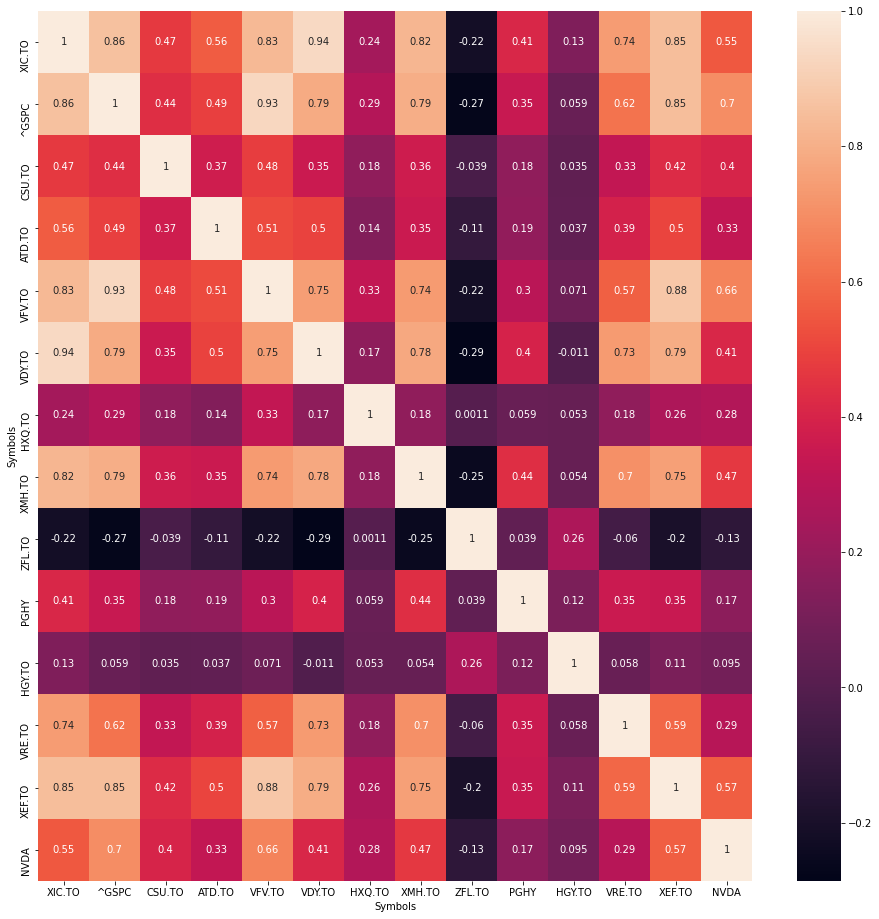

In [16]:
# Visualize correlations
plt.figure(figsize=(16, 16))
sns.heatmap(df_stock_returns.corr(), annot=True)

### Obtaining the risk free rate rf
Mostly, the rf rate is extracted from the [US government tresury bond](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=billratesAll).

The value can be calculated or looked up online, but I will take 0 for simplicity.

In [17]:
# 3 year treasury yield
rf = 0

This rf is already the yearly value. Our current data table contains the daily returns. We need to translate these to yearly values. There are 252 trading days in a year.

In [18]:
def sharpe_calculation(stock):
    '''Function to calculate the Sharpe Ratio
    Input: Range of a stock's daily returns
    Output: Sharpe Ratio'''

    # Compound Annual Growth Rate
    cagr = ((df_stocks[stock].iloc[-1] / df_stocks[stock].iloc[0]) ** (1 / 3) - 1) * 100

    # Annualized volatility
    std_yrly = df_stock_returns[stock].std() * np.sqrt(252)

    return (cagr - rf) / std_yrly

In [19]:
# OK, let's now calculate all
for i in df_stock_returns.columns:
    if i != '^GSPC':
        print('Sharpe Ratio for {}: {:2.4}'.format(i, sharpe_calculation(i)))

Sharpe Ratio for XIC.TO: 0.8552
Sharpe Ratio for CSU.TO: 1.46
Sharpe Ratio for ATD.TO: 0.6042
Sharpe Ratio for VFV.TO: 1.136
Sharpe Ratio for VDY.TO: 0.7579
Sharpe Ratio for HXQ.TO: 1.121
Sharpe Ratio for XMH.TO: 0.7043
Sharpe Ratio for ZFL.TO: 0.3429
Sharpe Ratio for PGHY: 0.3071
Sharpe Ratio for HGY.TO: 0.4901
Sharpe Ratio for VRE.TO: 0.5464
Sharpe Ratio for XEF.TO: 0.6165
Sharpe Ratio for NVDA: 2.242
